In [98]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/home/sudat/athena/vis/python')
import athena_read

In [99]:
'''Reading data from VTK files'''
r,phi,z,data = athena_read.vtk('disk.block0.out1.00700.vtk')
disk = athena_read.hst('disk.hst')
density = data.get('dens')
time = disk.get('time')[700]

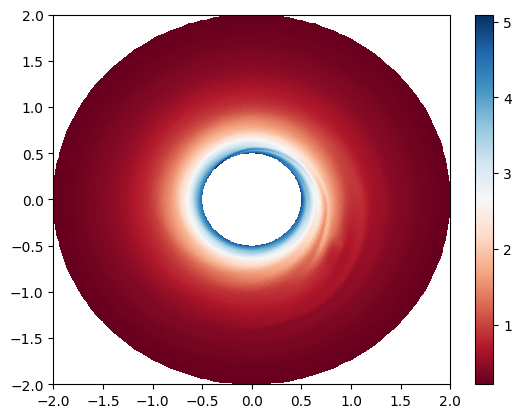

In [100]:
'''Plot 2-D surface density mesh plot, Conversion from Polar -> Cartesian'''
x = r[None,:] * np.cos(phi[:,None])
y = r[None,:] * np.sin(phi[:, None])
plt.pcolormesh(x,y, density[0], cmap='RdBu')
plt.colorbar()

In [101]:
'''Find mid-point values of each mesh cell'''
r_mid = np.array([])
phi_mid = np.array([])

for i in range(len(r)):
    if i < 192:
        r_mid = np.append(r_mid, ((r[i] + r[i+1])/2))

for j in range(len(phi)):
    if j < 192:
        phi_mid = np.append(phi_mid, ((phi[j] + phi[j+1])/2))

In [102]:
'''Find the distance between planet and arbitrary mesh cell'''
rp = 1.0
gm = 1.0
gm_planet = 0.00000954588
period = 2*np.pi*np.sqrt(rp**3 / 1.0)
phip = 2 * (np.pi / period)*time
d= np.sqrt(rp**2 + r_mid[None,:]**2 - 2*rp*r_mid[None,:]*np.cos(phip - phi_mid[:,None]))

In [103]:
'''Calculate gravitational acceleration given a smoothing function'''
for i in np.nditer(d):
    if i > 0.05:
        g_mag = (gm_planet / (d**2))
    else:
        g_mag = (gm_planet*d / (0.05**3))

In [104]:
'''Find the directions of the gravitational accceleration'''
cosine_term = -1*((r_mid[None,:]**2) * (np.cos(phi_mid[:,None])**2) - r_mid[None,:]*rp*np.cos(phi_mid[:,None])*np.cos(phip) + (r_mid[None,:]**2) * (np.sin(phi_mid[:,None])**2) - r_mid[None,:]*rp*np.sin(phi_mid[:,None])*np.sin(phip)) / (r_mid[None,:]*d)
sine_term = (r_mid[None,:]*rp*np.cos(phi_mid[:,None])*np.sin(phip) - r_mid[None,:]*rp*np.sin(phi_mid[:,None])*np.cos(phip))/ (r_mid[None,:] * d)
g_r = g_mag * cosine_term
g_phi = g_mag * sine_term

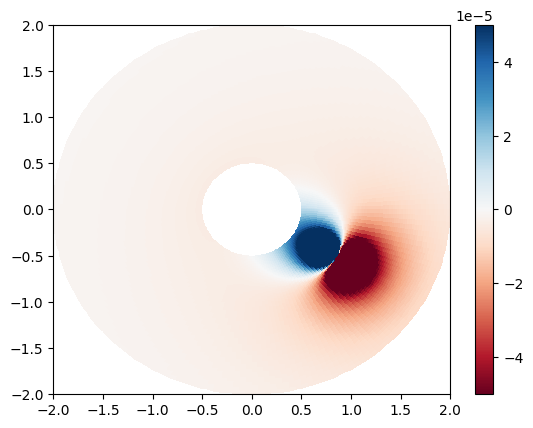

In [105]:
'''Plot gravitational acceleration mesh plot in r-direction'''
plt.pcolormesh(x,y, g_r, cmap = 'RdBu', vmin=-0.00005, vmax= 0.00005)
plt.colorbar()

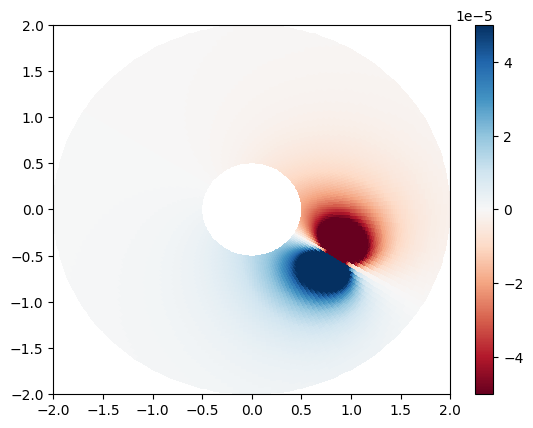

In [106]:
'''Plot gravitational acceleration mesh plot in phi-direction'''
plt.pcolormesh(x,y, g_phi, cmap = 'RdBu', vmin=-0.00005, vmax= 0.00005)
plt.colorbar()